<a href="https://colab.research.google.com/github/MolecularFoundry/crucible-analysis-notebooks/blob/main/dvs-analysis/basic-analysis-DVS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [5]:
project_id = "MFP09238"

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
dataset_options = glob.glob(f"/content/drive/Shareddrives/{project_id}/Datasets/*/*.xls")

print("Datasets found at the path above are: ")
for ds in dataset_options:
  print(ds)

Datasets found at the path above are: 
/content/drive/Shareddrives/MFP09238/Datasets/0sn06e2rhntzz0002nr58z3bv8/test-kw-parse.xls


In [9]:
dsname = "/content/drive/Shareddrives/MFP09238/Datasets/0sn06e2rhntzz0002nr58z3bv8/test-kw-parse.xls" # copy and paste one of the dataset paths from above

In [10]:
tmp = pd.read_excel(dsname,
       sheet_name = "DVS Data",
       index_col = 0,
       header= None,
       usecols= [0,1])

num_rows = tmp.loc['Data Start Row:', 1]
df = pd.read_excel(dsname, sheet_name = "DVS Data",
                   skiprows = (num_rows - 2)) #(header will one be before data start row and don't skip it : ))


In [11]:
df.columns

Index(['Time [minutes]', 'Mass [mg]', 'Delta Mass [%]', 'dm/dt [%/minute]',
       'Target Incubator Temp. [celsius]',
       'Measured Incubator Temp. [celsius]',
       'Target Preheater Temp. [celsius]',
       'Measured Preheater Temp. [celsius]', 'Sorption Temp. [celsius]',
       'Target Partial Pressure (Solvent A) [%]',
       'Measured Partial Pressure (Solvent A) [%]',
       'Target Partial Pressure (Solvent B) [%]',
       'Measured Partial Pressure (Solvent B) [%]', 'Total Gas Flow [sccm]',
       'Target Wet Gas Flow (Solvent A) [sccm]',
       'Actual Wet Gas Flow (Solvent A) [sccm]',
       'Target Dry Gas Flow (Solvent A) [sccm]',
       'Actual Dry Gas Flow (Solvent A) [sccm]',
       'Target Wet Gas Flow (Solvent B) [sccm]',
       'Actual Wet Gas Flow (Solvent B) [sccm]',
       'Target Dry Gas Flow (Solvent B) [sccm]',
       'Actual Dry Gas Flow (Solvent B) [sccm]', 'dm (%) - ref',
       'User Defined 1', 'User Defined 2', 'Unnamed: 25',
       'Target PP/100 (So

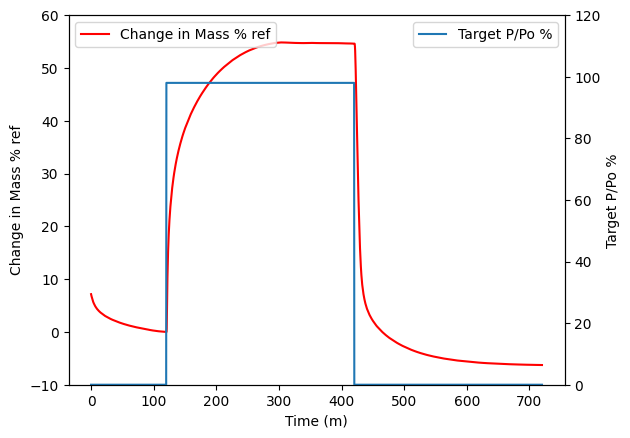

In [21]:
fig,ax = plt.subplots()
ax.plot(df['Time [minutes]'], df['dm (%) - ref'], "r", label = 'Change in Mass % ref')
ax.set_xlabel("Time (m)")
ax.set_ylabel("Change in Mass % ref")
ax.set_ylim([-10,60])

ax2 = ax.twinx()
ax2.plot(df['Time [minutes]'], df['Target Partial Pressure (Solvent A) [%]'], label = 'Target P/Po %')
ax2.set_ylabel("Target P/Po %")
ax2.set_ylim([0,120])

ax.legend(loc = 2)
ax2.legend(loc = 0)